# PLSR

In [21]:
# The basics
import pandas as pd
import numpy as np

# Cross validation and model selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Plotting
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.pylab as pl
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker
mpl.rc('font',family='Helvetica')
from plot_actual_vs_pred import plot_actual_vs_pred

# Models
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler




In [2]:
# Reading data
sensor = pd.read_csv('../../data/averaged_features_sensor1.csv')
sensor.head(10)

,exposure,NO,NO2,NH3,0.05-1-slope-0,0.05-1-slope-1,0.05-1-slope-2,0.05-1-slope-3,0.05-1-slope-4,0.05-1-slope-5,...,2500.0-1-avg-230,2500.0-1-avg-231,5000.0-1-avg-232,5000.0-1-avg-233,5000.0-1-avg-234,5000.0-1-avg-235,5000.0-1-avg-236,5000.0-1-avg-237,5000.0-1-avg-238,5000.0-1-avg-239
0,0,5.0,5.0,5.0,-26.386178,-14.165356,-0.234640,-0.091757,-0.103611,-0.074383,...,35.418769,35.408092,35.281180,35.205123,35.206299,35.186754,35.183971,35.150467,35.162932,35.152458
1,1,5.0,5.0,10.0,-26.294332,-14.421532,-0.216090,-0.126324,-0.107321,-0.071034,...,34.869225,34.864293,34.732586,34.668700,34.649606,34.643928,34.639743,34.628251,34.622460,34.623591
2,2,5.0,5.0,20.0,-25.514491,-15.174588,-0.253371,-0.157995,-0.108769,-0.090761,...,35.287604,35.281044,35.147368,35.088776,35.064683,35.051404,35.046087,35.026926,35.025637,35.023103
3,3,5.0,5.0,40.0,-25.906221,-14.565139,-0.306851,-0.142612,-0.155371,-0.041716,...,34.835653,34.827193,34.692861,34.639381,34.608072,34.611329,34.597168,34.593820,34.575699,34.576649
4,4,5.0,5.0,80.0,-26.731849,-13.795072,-0.241065,-0.139716,-0.165596,-0.061352,...,35.112620,35.105132,34.979939,34.911710,34.899019,34.891848,34.873184,34.865515,34.860040,34.854340
5,5,5.0,10.0,5.0,-25.741620,-14.973158,-0.147498,-0.133292,-0.117275,-0.054565,...,34.552918,34.551380,34.420147,34.356103,34.344113,34.326649,34.320405,34.315111,34.307555,34.302940
6,6,5.0,10.0,10.0,-25.991915,-14.595273,-0.323320,-0.205321,-0.117275,-0.135373,...,34.974827,34.977089,34.846467,34.774030,34.764528,34.761429,34.743784,34.748647,34.740413,34.725075
7,7,5.0,10.0,20.0,-26.182667,-14.466053,-0.154918,-0.120713,-0.085603,-0.062257,...,35.119113,35.114950,34.975324,34.910737,34.890535,34.886893,34.877301,34.853208,34.850222,34.841626
8,8,5.0,10.0,40.0,-26.394051,-14.172142,-0.196182,-0.125238,-0.117818,-0.093747,...,34.968854,34.950960,34.836128,34.767243,34.742517,34.734395,34.727835,34.717293,34.700914,34.701593
9,9,5.0,10.0,80.0,-26.490876,-14.167800,-0.176817,-0.085784,-0.076011,-0.141617,...,34.577758,34.570111,34.435372,34.382119,34.352845,34.339860,34.336716,34.336829,34.315518,34.313618


In [3]:
# Separating dependent and independent variables Y and X:
X = sensor.iloc[:, 244:]
Y = sensor.iloc[:, 1:4]
stdY = Y.std(axis = 0)
meanY = Y.mean(axis = 0)


#X, X_val, Y, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

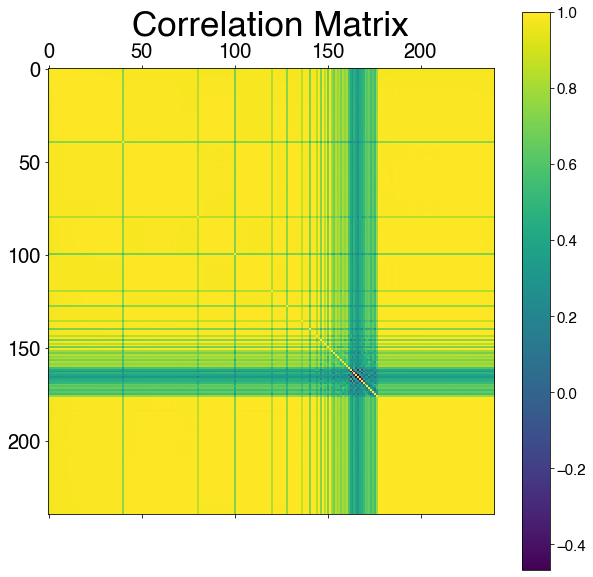

In [4]:
# Correlation Matrix
fig = plt.figure(figsize=(10, 10))
plt.matshow(pd.DataFrame(X).corr(), fignum=fig.number)
plt.tick_params(axis='both', which='major', labelsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=15)
plt.title('Correlation Matrix', fontsize=35, fontname = 'Helvetica');
plt.show()

In [23]:
from sklearn.cross_decomposition import PLSRegression

scaler = StandardScaler()

X = scaler.fit_transform(X)



plsr = PLSRegression(80)

plsr.fit(X, Y)

PLSRegression(n_components=80)

In [24]:
total_variance_in_X = np.sum(np.var(X, axis = 0))

In [25]:
expln_var_X = np.var(plsr.x_scores_, axis = 0)/total_variance_in_X

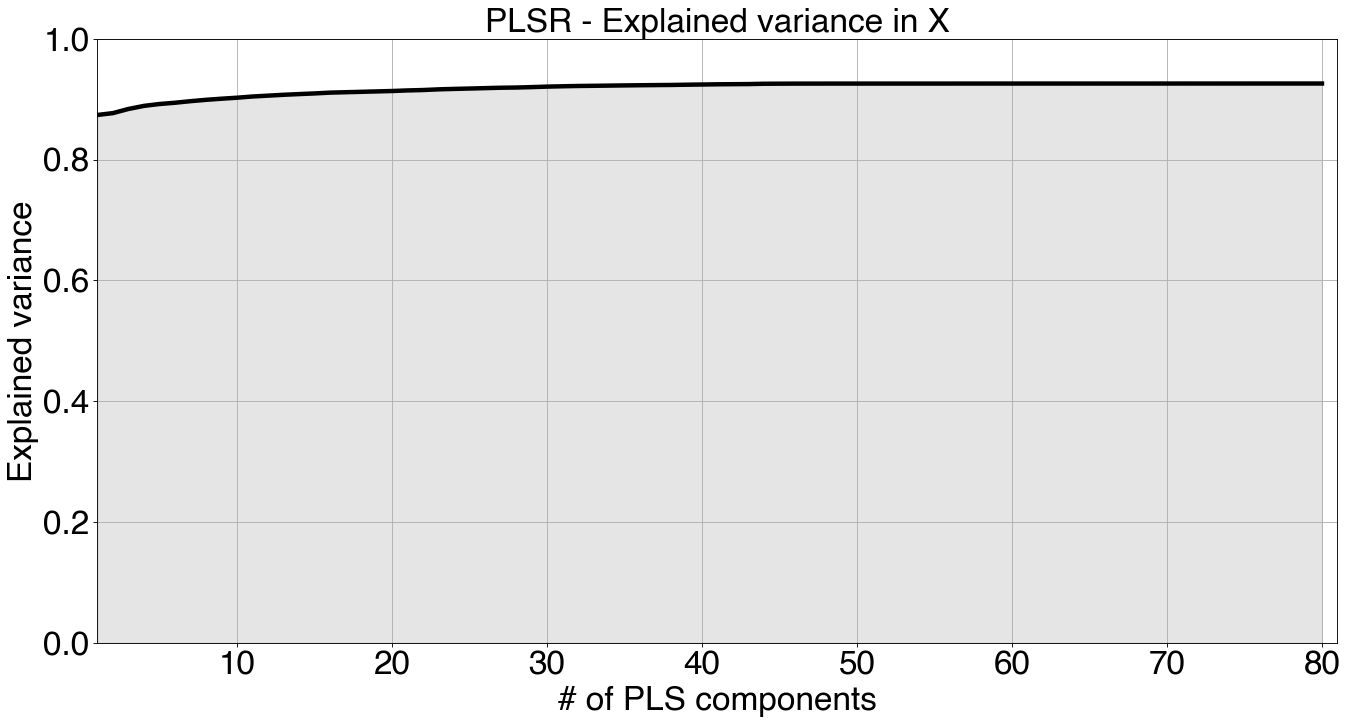

In [28]:
exp_var_cumulX = np.cumsum(expln_var_X)

fig = plt.figure(figsize = (20,10), dpi = 80)
plt.title('PLSR - Explained variance in X', fontsize = 30)
plt.ylim(0, 1)
plt.xlim(1,81)
plt.xlabel('# of PLS components', fontsize = 30)
plt.ylabel('Explained variance', fontsize = 30)
plt.plot(
    range(1, exp_var_cumulX.shape[0] + 1),
    exp_var_cumulX,
    color = 'black', lw = 4
)
plt.fill_between(range(1, exp_var_cumulX.shape[0] + 1), exp_var_cumulX, color = 'black', alpha = 0.1)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.grid()
#plt.savefig('../../figures/plsr-explained-variance.png')
plt.show()


In [29]:
# Running PLSR with 2 components
# Instatiating
X = sensor.iloc[:, 244:]
Y = sensor.iloc[:, 1:4]
plsr = PLSRegression(n_components = 2)

# Fitting
fit = plsr.fit(X, Y)
pcs = fit.x_scores_

pl_df = pd.DataFrame(pcs, columns = ['PLS1', 'PLS2']) 

# Summary
pls_df = pd.concat((Y, pl_df), axis = 1)
pls_df.head(10)

,NO,NO2,NH3,PLS1,PLS2
0,5.0,5.0,5.0,24.196213,0.195223
1,5.0,5.0,10.0,-0.444558,-0.021376
2,5.0,5.0,20.0,17.361500,0.274925
3,5.0,5.0,40.0,-0.188409,0.521827
4,5.0,5.0,80.0,11.458007,-0.034520
5,5.0,10.0,5.0,-14.300724,-0.510252
6,5.0,10.0,10.0,5.234837,0.517661
7,5.0,10.0,20.0,11.682820,-0.565098
8,5.0,10.0,40.0,4.803041,1.094923
9,5.0,10.0,80.0,-12.874212,-0.497874


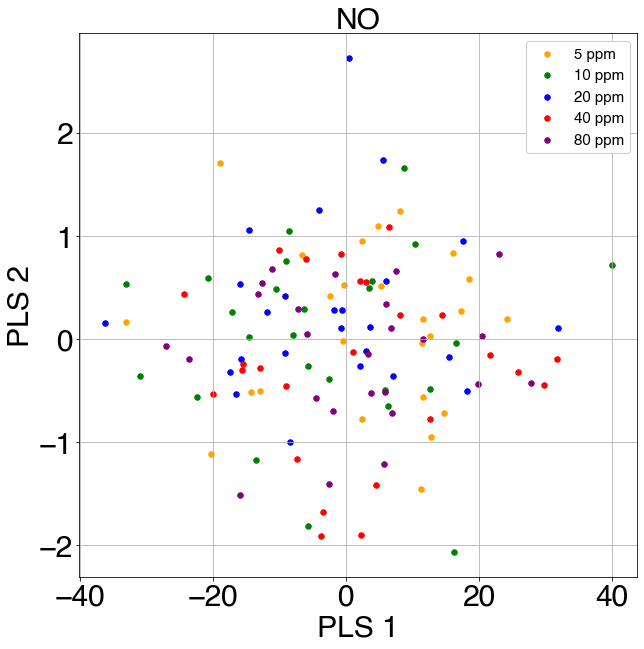

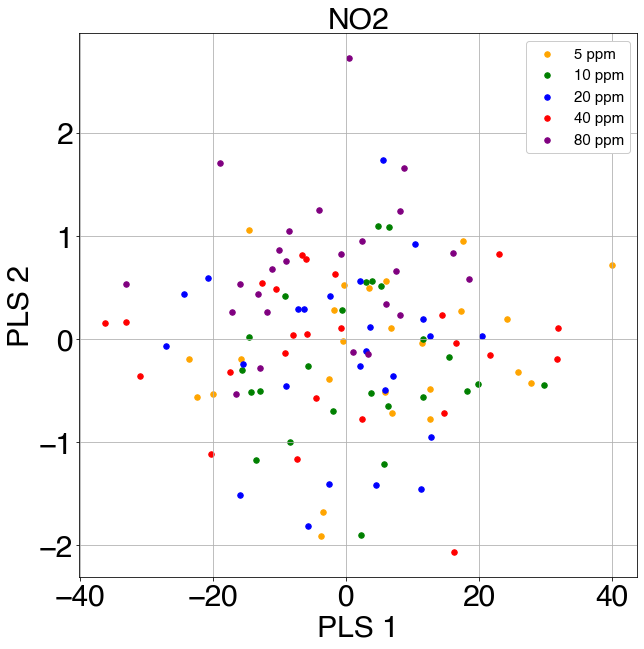

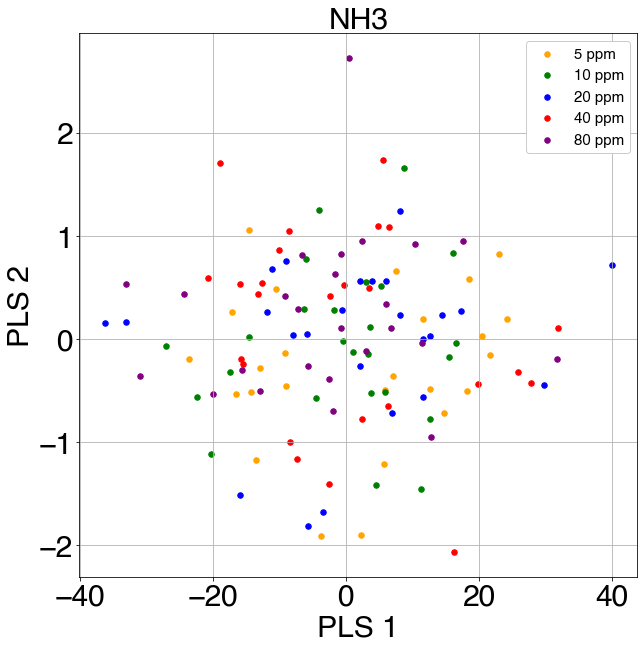

In [30]:
# Trying 2 components - useless

gasses = ['NO', 'NO2', 'NH3']
concentrations = [5, 10, 20, 40, 80]
colors = ['orange', 'green', 'blue', 'red', 'purple']


for gas in gasses:
    fig = plt.figure(figsize = (10,10))
    plt.xlabel('PLS 1', fontsize = 30, fontname = 'Helvetica')
    plt.ylabel('PLS 2', fontsize = 30, fontname = 'Helvetica')
    plt.title(gas, fontsize = 30, fontname = 'Helvetica')
    plt.tick_params(axis='both', which='major', labelsize=30)
    for conc, color in zip(concentrations, colors):
        
        idx = pls_df[gas] == conc
        pc1 = pls_df.loc[idx, 'PLS1']
        pc2 = pls_df.loc[idx, 'PLS2']
        plt.scatter(pc1, pc2, color = color , s = 30)
    plt.legend(['5 ppm', '10 ppm', '20 ppm', '40 ppm', '80 ppm'], fontsize = 15, facecolor='white', framealpha=1)
    plt.grid()
    plt.show()

In [14]:
# Train test split
X = np.array(sensor.iloc[:, 244:])
Y = np.array(sensor.iloc[:, 1:4])
X, X_val, Y, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
steps = [('PLSR', PLSRegression(max_iter = 1000))]

n_comps = list(range(1,80))

params = [{'PLSR__n_components':n_comps}]

pipe = Pipeline(steps)

grid_search = GridSearchCV(pipe,
                           params,
                           scoring = 'neg_root_mean_squared_error',
                           return_train_score=True
                          )

grid_search.fit(X, Y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

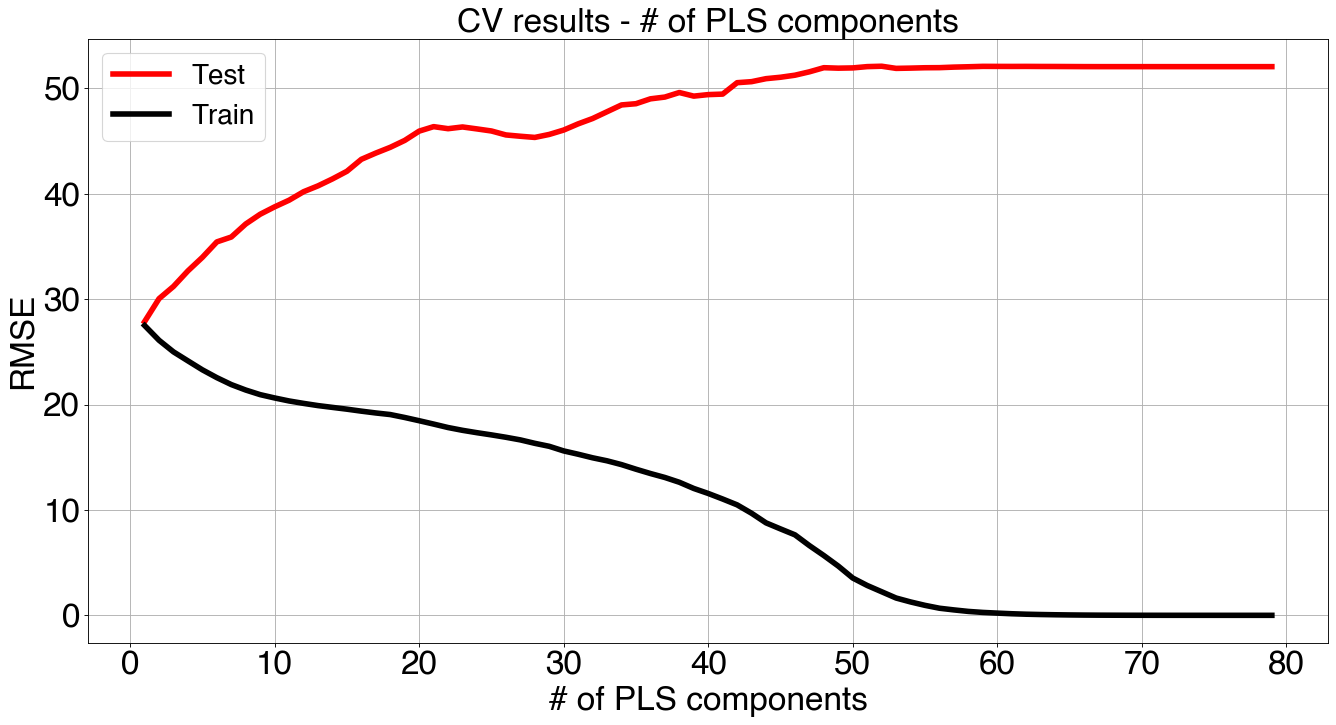

In [19]:
test_scores = -grid_search.cv_results_['mean_test_score']
train_scores = -grid_search.cv_results_['mean_train_score']

fig = plt.figure(figsize = (20,10), dpi = 80)
plt.title('CV results - # of PLS components', fontsize = 30)
plt.xlabel('# of PLS components', fontsize = 30)
plt.ylabel('RMSE', fontsize = 30)
plt.plot(n_comps,test_scores, label='Test', lw = 5, color = 'red')
plt.plot(n_comps,train_scores, label='Train', lw = 5, color = 'black')
plt.tick_params(axis='both', which='major', labelsize=30)
plt.grid()
plt.legend(loc='best', fontsize = 25)
#plt.savefig('../../figures/pls-cv-exposures.png')
plt.show()

In [32]:
best_params

{'PLSR__n_components': 1}

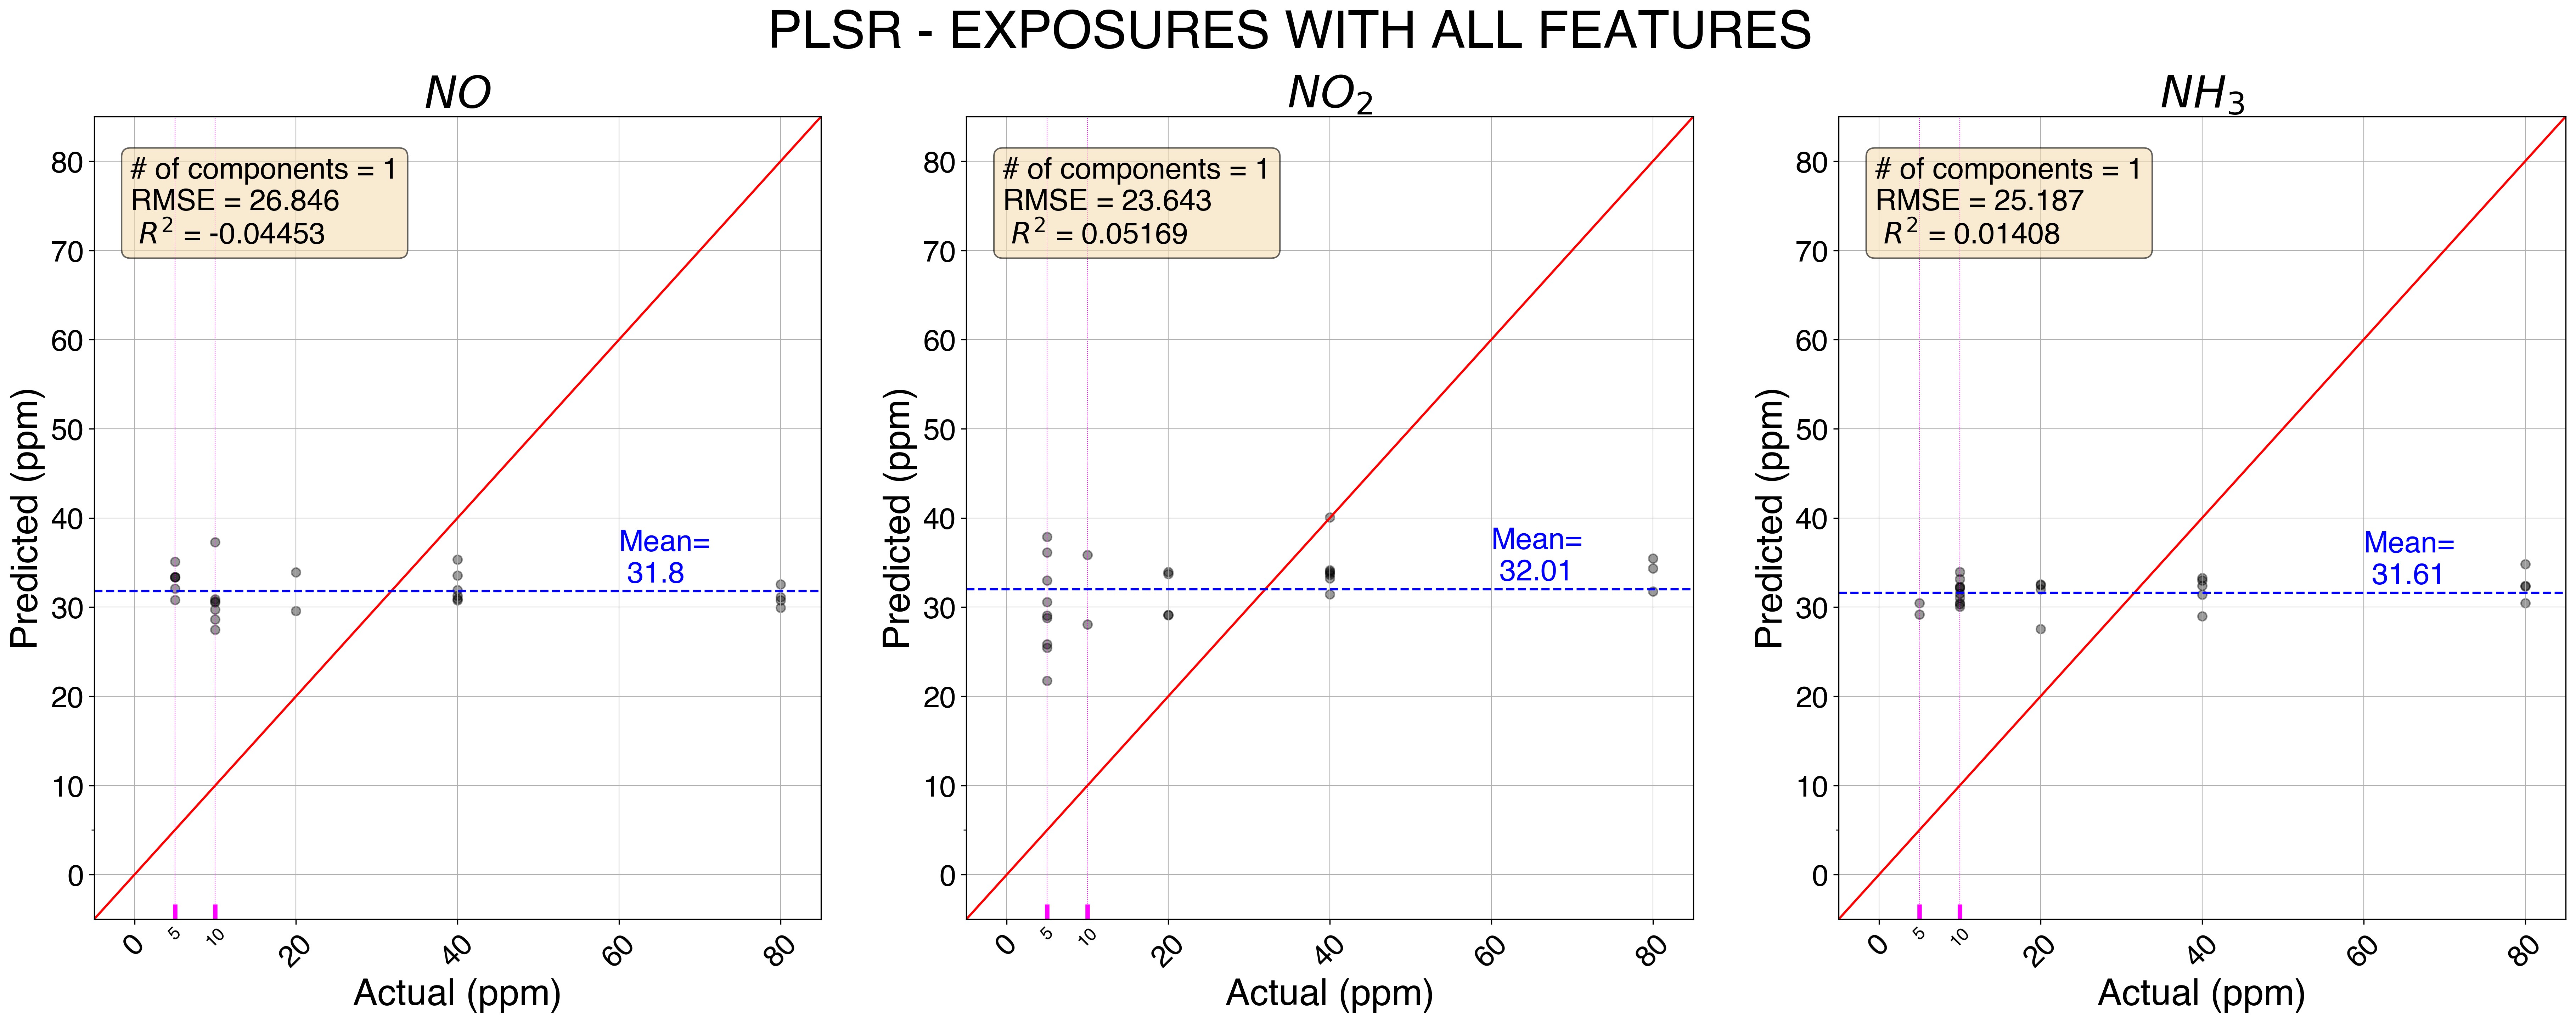

In [33]:
# Predicting on unseen validation data
Y_pred = grid_search.best_estimator_.predict(X_val)


# Plotting actual vs. predicted
RMSEs = np.round(mean_squared_error(Y_val, Y_pred, squared=False, multioutput = 'raw_values'), 3)
Rsquares = np.round(r2_score(Y_val, Y_pred, multioutput = 'raw_values'), 5)

info = [f"# of components = {best_params['PLSR__n_components']} \nRMSE = {RMSEs[i]} \n$R^2$ = {Rsquares[i]}" for i in range(3)]
plot_actual_vs_pred(Y_val, Y_pred, 'PLSR - EXPOSURES WITH ALL FEATURES', info)  